In [1]:

import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
y_train=y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [4]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

In [5]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck.']

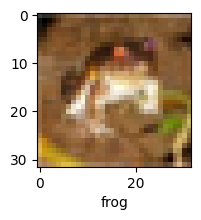

In [6]:
plot_sample(X_train,y_train,0)

In [7]:
X_train=X_train/255
X_test=X_test/255

In [8]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [9]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])



In [10]:
cnn.fit(X_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 77s 48ms/step - loss: 1.4383 - accuracy: 0.4860
Epoch 2/20
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0863 - accuracy: 0.6205
Epoch 3/20
1563/1563 [==============================] - 60s 39ms/step - loss: 0.9560 - accuracy: 0.6665
Epoch 4/20
1563/1563 [==============================] - 62s 39ms/step - loss: 0.8694 - accuracy: 0.6982
Epoch 5/20
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8015 - accuracy: 0.7242
Epoch 6/20
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7446 - accuracy: 0.7427
Epoch 7/20
1563/1563 [==============================] - 62s 39ms/step - loss: 0.6961 - accuracy: 0.7586
Epoch 8/20
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6544 - accuracy: 0.7720
Epoch 9/20
1563/1563 [==============================] - 65s 41ms/step - loss: 0.6176 - accuracy: 0.7842
Epoch 10/20
1563/1563 [==============================] - 62s 39m

In [11]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 1.2880 - accuracy: 0.6885


[1.2880357503890991, 0.6884999871253967]

In [12]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 14ms/step


array([[7.2525028e-04, 6.1897190e-05, 1.0017405e-05, 9.8369598e-01,
        3.5226847e-05, 5.6720302e-03, 1.4144250e-03, 3.2335361e-06,
        8.3792210e-03, 2.5610082e-06],
       [1.6359298e-05, 6.2571984e-05, 9.1714561e-12, 4.6191896e-12,
        3.5888474e-16, 2.6914522e-16, 5.4033438e-13, 1.1908750e-18,
        9.9953431e-01, 3.8673187e-04],
       [9.8963839e-04, 3.5494365e-02, 7.6725679e-05, 1.5401545e-04,
        7.1767414e-07, 9.9760846e-06, 6.4859186e-08, 1.9684609e-09,
        9.6320778e-01, 6.6657754e-05],
       [9.8934102e-01, 7.0509099e-04, 1.4455307e-03, 5.1892486e-05,
        1.7331933e-05, 3.7508784e-08, 1.6758650e-05, 1.5706941e-05,
        8.4004486e-03, 6.0541220e-06],
       [6.6533279e-11, 7.6373595e-07, 1.7156763e-04, 2.8261510e-03,
        2.0053985e-03, 8.2206163e-05, 9.9491292e-01, 7.7438445e-11,
        9.9245165e-07, 4.1267079e-09]], dtype=float32)

In [13]:
y_pred=y_pred.reshape(-1)
y_pred

array([7.2525028e-04, 6.1897190e-05, 1.0017405e-05, ..., 9.9991578e-01,
       3.3992936e-15, 1.6920055e-12], dtype=float32)

In [16]:
classes[np.argmax(y_pred[0])]

'airplane'